In [1]:
%pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 --extra-index-url https://download.pytorch.org/whl/cu116
%pip install matplotlib numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     |████████████████████████████████| 1904.8 MB 9.0 kB/s  eta 0:00:01    |█▉                              | 110.8 MB 80.5 MB/s eta 0:00:23     |████████████████                | 956.0 MB 72.7 MB/s eta 0:00:14     |███████████████████████████████▏| 1853.9 MB 99.2 MB/s eta 0:00:01     |███████████████████████████████▏| 1858.0 MB 99.2 MB/s eta 0:00:01
     |████████████████████████████████| 23.5 MB 13.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import json

def load_json(file_path):
    """Load JSON data from a given file path."""
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

def filter_team_data(data):
    """Filter and return data for ball_control, ally_control, and valid_passes."""
    # Extract version, start_time, end_time, score, and result information
    filtered_data = {
        "version": data.get("version"),
        "start_time": data.get("start_time"),
        "end_time": data.get("end_time"),
        "score": data.get("score"),
        "result": data.get("result"),
        "map": data.get("map"),
        "ball_control": [],
        "ally_control": [],
        "valid_passes": [],
        "goal_control": [],
        "boost_used": []
    }

    # Filter data for ball_control, ally_control, and valid_passes
    rounds = data.get("rounds", {})
    for round_data in rounds.values():
        filtered_data["ball_control"].extend(round_data.get("ball_control", []))
        filtered_data["ally_control"].extend(round_data.get("ally_control", []))
        filtered_data["valid_passes"].extend(round_data.get("valid_passes", []))
        filtered_data["goal_control"].extend(round_data.get("goal_control", []))
        filtered_data["boost_used"].extend(round_data.get("boost_used", []))
#goal control 

    return filtered_data

def process_team_data(file_path):
    """Process the game data and return filtered data for ball control, ally control, and valid passes."""
    data = load_json(file_path)

    # Filter the data
    team_data = filter_team_data(data)

    print("Processing Rocket League data for ball_control, ally_control, and valid_passes")

    return team_data

# Usage Example
file_path = 'Data/109554.json'# Path to your JSON file




In [6]:

#C:/Users/Omnic/Downloads/8020_madden_postprocess.json


# Get the total game time from the data
start_time = team_data['start_time']
end_time = team_data['end_time']

# Create 5 equal chunks based on the total time
total_time = end_time - start_time
chunk_duration = total_time // 100

# Create chunks
chunks = []
for i in range(100):
    chunk_start = start_time + i * chunk_duration
    chunk_end = chunk_start + chunk_duration
    chunks.append((chunk_start, chunk_end))

print("Game Chunks (Start-End Times in ms):", chunks)


NameError: name 'team_data' is not defined

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

chunk_features = []

for i, chunk in enumerate(chunks):
    # Initialize lists to gather plays within the chunk range
    ball_control_in_chunk = []
    ally_control_in_chunk = []
    valid_passes_in_chunk = []
    goal_control_in_chunk = []
    boost_used_in_chunk = []

    # Check ball control data in the chunk range
    for control in team_data['ball_control']:
        if chunk[0] <= control[0] <= chunk[1]:
            ball_control_in_chunk.append(control)
            
    # Check ally control data in the chunk range
    for ally in team_data['ally_control']:
        if chunk[0] <= ally[0] <= chunk[1]:
            ally_control_in_chunk.append(ally)
            
    # Check valid passes in the chunk range
    for pass_data in team_data['valid_passes']:
        if chunk[0] <= pass_data[0] <= chunk[1]:
            valid_passes_in_chunk.append(pass_data)
            
    for goal in team_data['goal_control']:
        if chunk[0] <= goal[0] <= chunk[1]:
            goal_control_in_chunk.append(goal) 
                   
    for boost in team_data['boost_used']:
        if chunk[0] <= boost[0] <= chunk[1]:
            boost_used_in_chunk.append(boost)
    # Aggregate features for the chunk (e.g., number of controls, valid passes)
    if ball_control_in_chunk or ally_control_in_chunk or valid_passes_in_chunk or goal_control_in_chunk:
        ball_control_count = len(ball_control_in_chunk)
        ally_control_count = len(ally_control_in_chunk)
        valid_passes_count = len(valid_passes_in_chunk)
        goal_control_count = len(goal_control_in_chunk)
        boost_used_count = len(boost_used_in_chunk)
        # Append the aggregated features per chunk
        chunk_features.append([ball_control_count, ally_control_count, valid_passes_count, goal_control_count,boost_used_count, i])

# Convert to DataFrame for easy visualization
df_chunks = pd.DataFrame(chunk_features, columns=['Ball_Control_Count', 'Ally_Control_Count', 'Valid_Passes_Count', 'Goal_Control_Count','Boost_Used_Count','Chunk_ID'])
print(df_chunks)
# Normalize the data
#scaler = MinMaxScaler()
#df_chunks[['Ball_Control_Count', 'Ally_Control_Count', 'Valid_Passes_Count','Goal_Control_Count','Boost_Used_Count']] = scaler.fit_transform(df_chunks[['Ball_Control_Count', 'Ally_Control_Count', 'Valid_Passes_Count','Goal_Control_Count','Boost_Used_Count']])

#print(df_chunks)


NameError: name 'chunks' is not defined

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the DQN model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Example model
input_dim = len(df_chunks)  
output_dim = 1  # Likelihood to win
model = DQN(input_dim, output_dim)

# Print model summary
print(model)


DQN(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [6]:
import random
import numpy as np

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.batch_size = 32
        self.model = DQN(state_size, action_size)
        self.target_model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            # Random action using the correct random module function
            return random.randrange(self.action_size)
        state = torch.FloatTensor(state).unsqueeze(0)
        act_values = self.model(state)
        return torch.argmax(act_values[0]).item()

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > 2000:
            self.memory.pop(0)

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).unsqueeze(0)
            next_state = torch.FloatTensor(next_state).unsqueeze(0)
            target = reward
            if not done:
                target = (reward + self.gamma * torch.max(self.target_model(next_state)[0]).item())
            target_f = self.model(state)
            target_f[0][action] = target

            self.optimizer.zero_grad()
            loss = nn.MSELoss()(target_f, self.model(state))
            loss.backward()
            self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())


In [7]:
# Sample reward function
def calculate_reward(is_win, is_loss, reward):
    """
    Calculate reward based on win/loss conditions.
    
    - `is_win`: Boolean, True if player wins.
    - `is_loss`: Boolean, True if player loses.
    - `reward`: Current reward to be modified based on win/loss.
    """
    if is_win:
        reward += 1  # Positive reward for a win
    elif is_loss:
        reward -= 1  # Penalty for a loss
    else:
        reward = max(reward, 0)  # Ensure no negative reward accumulation
    
    return reward

agent = DQNAgent(state_size=5, action_size=1)  

num_episodes = 100  # Number of episodes for training

for e in range(num_episodes):
    for chunk in chunk_features:
        state = np.array(chunk[:-1])  # Exclude Chunk_ID
        action = agent.act(state)

        # Simulate reward and next state
        reward = chunk[-1] * 10  # Example reward based on Chunk_ID
        next_state = state
        done = False

        agent.remember(state, action, reward, next_state, done)
        agent.replay()

    agent.update_target_model()

    if e % 10 == 0:
        print(f"Episode {e}/{num_episodes}, Epsilon: {agent.epsilon}")


Episode 0/100, Epsilon: 0.7076077347272662
Episode 10/100, Epsilon: 0.00998645168764533
Episode 20/100, Epsilon: 0.00998645168764533
Episode 30/100, Epsilon: 0.00998645168764533
Episode 40/100, Epsilon: 0.00998645168764533
Episode 50/100, Epsilon: 0.00998645168764533
Episode 60/100, Epsilon: 0.00998645168764533
Episode 70/100, Epsilon: 0.00998645168764533
Episode 80/100, Epsilon: 0.00998645168764533
Episode 90/100, Epsilon: 0.00998645168764533


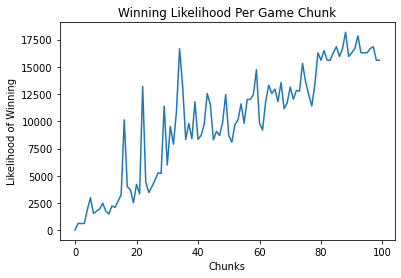

In [9]:
import matplotlib.pyplot as plt

likelihoods = []
for chunk in chunk_features:
    state = np.array(chunk[:-1])
    q_value = agent.model(torch.FloatTensor(state).unsqueeze(0))[0].item()
    likelihoods.append(q_value)

# Plot the likelihood of winning for each chunk
plt.plot(range(len(likelihoods)), likelihoods)
plt.xlabel('Chunks')
plt.ylabel('Likelihood of Winning')
plt.title('Winning Likelihood Per Game Chunk')
plt.show()


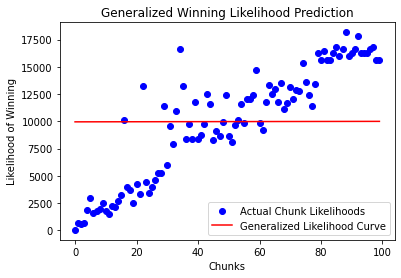

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming likelihoods contains continuous values representing the likelihood of winning
chunks = np.arange(len(likelihoods)).reshape(-1, 1)  # Reshape for model input

# Train a linear regression model to generalize likelihoods
linear_reg = LinearRegression()
linear_reg.fit(chunks, likelihoods)

# Get generalized predictions across all chunks
generalized_likelihoods = linear_reg.predict(chunks)  # Predicted likelihoods

# Plot the actual chunk likelihoods and the generalized trend
plt.scatter(range(len(likelihoods)), likelihoods, color='blue', marker='o', label='Actual Chunk Likelihoods')
plt.plot(range(len(likelihoods)), generalized_likelihoods, color='red', label='Generalized Likelihood Curve')
plt.xlabel('Chunks')
plt.ylabel('Likelihood of Winning')
plt.title('Generalized Winning Likelihood Prediction')
plt.legend()
plt.show()
